In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib.image as mpimg
import random

CATEGORIES = ["COVID", "non-COVID"]

# Training dataset preparation

In [28]:
training_data = []
DATADIR = "Train"
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = mpimg.imread(os.path.join(path,img)) 
               # img_array = img_array.resize(50, 50)
                #print(img_array.shape)
                training_data.append([img_array, class_num])
                #print(img_array.shape)
            except Exception as e:  
                pass
            

create_training_data()

100%|██████████| 700/700 [00:00<00:00, 1977.67it/s]


In [29]:
random.shuffle(training_data)

In [30]:
xtrain = []
ytrain = []
for features,label in training_data:
    xtrain.append(features)
    ytrain.append(label)

In [31]:
xtrain = np.asarray(xtrain) 
ytrain = np.asarray(ytrain) 
 

In [32]:
print(type(xtrain))
print(type(ytrain))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
ytrain = ytrain.astype('uint8')
print(ytrain.dtype)


uint8


In [34]:
print(xtrain.shape)
print(ytrain.shape)

(1400, 100, 100)
(1400,)


In [35]:
xtrain = xtrain.reshape(xtrain.shape[0],100,100,1)
print(xtrain.shape)


(1400, 100, 100, 1)


In [36]:
from keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
print(ytrain[0])

[1. 0.]


# Test dataset preparatoin 

In [37]:
testing_data = []
DATADIR = "Test"

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = mpimg.imread(os.path.join(path,img)) 
               # img_array = img_array.resize(50, 50)
                #print(img_array.shape)
                testing_data.append([img_array, class_num])
                #print(img_array.shape)
            except Exception as e:  
                pass
            

create_training_data()

100%|██████████| 284/284 [00:00<00:00, 1863.88it/s]


In [38]:
random.shuffle(testing_data)

In [39]:
xtest = []
ytest = []
for features,label in testing_data:
    xtest.append(features)
    ytest.append(label)

In [40]:
xtest  = np.asarray(xtest) 
ytest  = np.asarray(ytest)

In [41]:
print(type(xtest))
print(type(ytest))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
ytest = ytest.astype('uint8')
print(ytest.dtype)

uint8


In [43]:
print(xtest.shape)
print(ytest.shape)

(586, 100, 100)
(586,)


In [44]:
xtest =  xtest.reshape(xtest.shape[0],100,100,1)
print(xtest.shape)

(586, 100, 100, 1)


In [45]:
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


# Normalization

In [46]:
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest)) 
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain) 
std = np.std(xtrain)

print(mean) 
print(std)

xtrain -= mean 
xtrain /= std

xtest -= mean 
xtest /= std 
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

0.0 0.0
1.0 1.0
0.0 0.0
0.654997
0.26767886
1.2888691 1.2888691
-2.446951 -2.446951


# LeNet

In [47]:
from keras.layers import Dropout


In [48]:
import keras
from keras import models
from keras import layers
import tensorflow as tf

In [49]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(100,100,1), activation='relu', strides=(1,1), padding='valid'))
model.add(Dropout(0.2))

model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(2,2), padding='valid'))


model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 6)         156       
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               2

In [50]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=32,epochs=50, verbose=1)

Epoch 1/50
35/35 [==============================] - 6s 127ms/step - loss: 0.6552 - accuracy: 0.6180 - val_loss: 0.6198 - val_accuracy: 0.6500
Epoch 2/50
35/35 [==============================] - 4s 107ms/step - loss: 0.5360 - accuracy: 0.7479 - val_loss: 0.6715 - val_accuracy: 0.6143
Epoch 3/50
35/35 [==============================] - 4s 105ms/step - loss: 0.4843 - accuracy: 0.7696 - val_loss: 0.5866 - val_accuracy: 0.6893
Epoch 4/50
35/35 [==============================] - 4s 122ms/step - loss: 0.4199 - accuracy: 0.8241 - val_loss: 0.4587 - val_accuracy: 0.7929
Epoch 5/50
35/35 [==============================] - 6s 165ms/step - loss: 0.4262 - accuracy: 0.8073 - val_loss: 0.4914 - val_accuracy: 0.7500
Epoch 6/50
35/35 [==============================] - 5s 135ms/step - loss: 0.3928 - accuracy: 0.8319 - val_loss: 0.4001 - val_accuracy: 0.8250
Epoch 7/50
35/35 [==============================] - 4s 115ms/step - loss: 0.3458 - accuracy: 0.8525 - val_loss: 0.4226 - val_accuracy: 0.8000
Epoch 

# Evaluation

In [51]:
model.evaluate(xtest,ytest)

19/19 [==============================] - 1s 33ms/step - loss: 1.7792 - accuracy: 0.6041


[1.7791595458984375, 0.6040955781936646]

In [52]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

19/19 [==============================] - 1s 33ms/step - loss: 1.7792 - accuracy: 0.6041
1.7791595458984375
0.6040955781936646


In [53]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

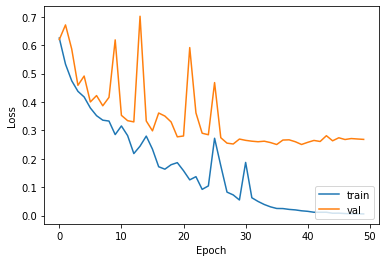

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

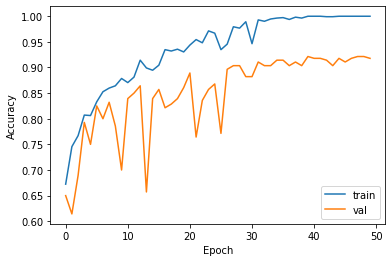

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'],loc=4)

In [56]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 100, 100, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [1. 0.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 0
3 Actual is  [0. 1.] Predicted is 1
4 Actual is  [1. 0.] Predicted is 1
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 1
8 Actual is  [0. 1.] Predicted is 1
9 Actual is  [1. 0.] Predicted is 1
10 Actual is  [0. 1.] Predicted is 1


# Accuracy, precision, recall ,f1 score

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(ytest1,y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(ytest1,y_pred)
print('Precision: %f' % precision)

recall = recall_score(ytest1,y_pred)
print('Recall: %f' % recall)

f1 = f1_score(ytest1,y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.604096
Precision: 0.561321
Recall: 0.838028
F1 score: 0.672316


# confusion matrix

In [70]:

from sklearn.metrics import confusion_matrix,classification_report
ytest1 = np.argmax(np.array(ytest), axis=1)
predictions = model.predict(xtest)
y_pred = np.argmax(predictions, axis=1)

cm=confusion_matrix(ytest1,y_pred)
print("confusion matrix : \n" ,cm)


confusion matrix : 
 [[116 186]
 [ 46 238]]
